In [2]:
!pip install fastai==2.0

     |████████████████████████████████| 350 kB 4.4 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 189 kB 4.4 MB/s 


In [ ]:
!pip install fastcore

     |████████████████████████████████| 56 kB 2.7 MB/s 


In [ ]:
!pip show fastcore

Name: fastcore
Version: 1.3.27
Summary: Python supercharged for fastai development
Home-page: https://github.com/fastai/fastcore/tree/master/
Author: Jeremy Howard and Sylvain Gugger
Author-email: infos@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: packaging, pip
Required-by: 


In [5]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [ ]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
seven_tensors = [tensor(Image.open(num)) for num in sevens]
three_tensors = [tensor(Image.open(num)) for num in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

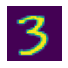

In [ ]:
show_image(three_tensors[1])

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [ ]:
stacked_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
len(stacked_threes.shape)

3

In [ ]:
stacked_threes.ndim

3

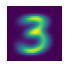

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

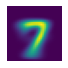

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

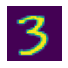

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3)

In [ ]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [ ]:
F.l1_loss(a_3,mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [ ]:
data = [[1,2,3], [4,5,6]]
tns = tensor(data)

In [ ]:
tns.type()

'torch.LongTensor'

In [ ]:
(tns*1.5).type()

'torch.FloatTensor'

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(num)) for num in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(num)) for num in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [ ]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1352, 0.1244, 0.1638,  ..., 0.1380, 0.1233, 0.1379]),
 torch.Size([1010]))

In [ ]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [ ]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [ ]:
is_3(valid_3_tens)

tensor([ True, False,  True,  ...,  True,  True,  True])

In [ ]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float().mean())

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [ ]:
xt = tensor(3.).requires_grad_()

In [ ]:
def f(x): return x**2

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor(6.)

In [ ]:
xt = tensor([3.,4.,10.]).requires_grad_()

In [ ]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return (x**2).sum()

In [ ]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor([ 6.,  8., 20.])

In [ ]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
speed

tensor([70.6534, 50.7248, 40.0643, 29.2106, 25.4191, 14.1730, 10.1968,  5.0340,
         0.2761, -2.5499,  1.5795,  6.2874,  7.3068, 12.6951, 16.9738, 24.1165,
        31.1309, 43.9861, 54.8268, 66.4126])

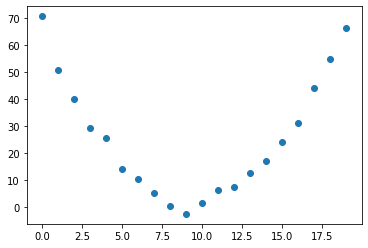

In [ ]:
plt.scatter(time,speed)

In [ ]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [ ]:
def mse(preds, targets): return ((preds - targets)**2).mean().sqrt()

In [ ]:
params = torch.randn(3).requires_grad_()

In [ ]:
params

tensor([ 0.6825, -0.5224, -0.4718], requires_grad=True)

In [ ]:
preds = f(time, params)

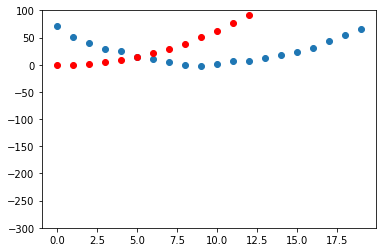

In [ ]:
def show_preds(preds, ax=None):
  if ax is None: ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300,100)

show_preds(preds)

In [ ]:
loss = mse(preds, speed)
loss

tensor(89.0300, grad_fn=<SqrtBackward0>)

In [ ]:
loss.backward()

In [ ]:
params.grad

tensor([161.1962,  10.3104,   0.6001])

In [ ]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [ ]:
params

tensor([ 0.6809, -0.5225, -0.4718], requires_grad=True)

In [ ]:
preds = f(time, params)
mse(preds, speed)

tensor(88.7691, grad_fn=<SqrtBackward0>)

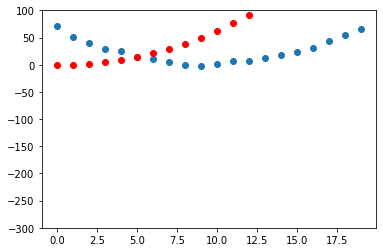

In [ ]:
show_preds(preds)

In [ ]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

In [ ]:
for i in range(10): apply_step(params)

72.39315795898438
72.14337158203125
71.89380645751953
71.64447021484375
71.39537811279297
71.1465072631836
70.89786529541016
70.64946746826172
70.40132904052734
70.15341186523438


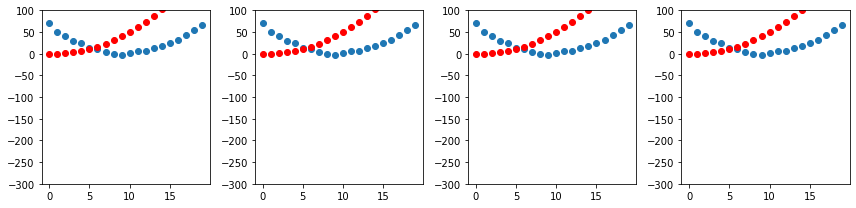

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [ ]:
unsqueeze??

In [ ]:
stacked_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [ ]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [ ]:
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
dset = list(zip(train_x, train_y))

In [ ]:
train_x.shape

torch.Size([12396, 784])

In [ ]:
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [ ]:
len(valid_dset)

2038

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params(28*28,1)

In [ ]:
weights.shape

torch.Size([784])

In [ ]:
bias = init_params(1)
bias.shape

torch.Size([1])

In [ ]:
train_x[0].shape, weights.shape, bias.shape

(torch.Size([784]), torch.Size([784]), torch.Size([1]))

In [ ]:
(train_x[0]*weights.T).sum() + bias

tensor([4.9366], grad_fn=<AddBackward0>)

In [ ]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([ 5.2219,  2.7728,  5.9356,  ..., 10.7256,  7.3352,  6.1192],
       grad_fn=<AddBackward0>)

In [ ]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True, False, False,  ..., False,  True, False],
        [ True, False, False,  ..., False,  True, False],
        [ True, False, False,  ..., False,  True, False],
        ...,
        [False,  True,  True,  ...,  True, False,  True],
        [False,  True,  True,  ...,  True, False,  True],
        [False,  True,  True,  ...,  True, False,  True]])

In [ ]:
corrects.float().mean().item()

0.5007569193840027

In [ ]:
trgts = tensor([1,0,1])
preds = tensor([0.9,0.4,0.2])

In [ ]:
def mnist_loss(predictions, targets): 
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
mnist_loss(preds, trgts)

tensor(0.4333)

In [ ]:
torch.where(trgts==1, 1-preds, preds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
trgts==1

tensor([ True, False,  True])

In [ ]:
tensor([2.2, -0.4, -3.8]).sigmoid()

tensor([0.9002, 0.4013, 0.0219])

In [ ]:
tensor([2.2, 0, -3.8]).sigmoid()

tensor([0.9002, 0.5000, 0.0219])

In [ ]:
torch.softmax(tensor([2.2, -0.4, -3.8]), dim=0)

tensor([0.9287, 0.0690, 0.0023])

In [ ]:
torch.softmax(tensor([2.2, -0.4, -3.8]), dim=0).sum()

tensor(1.)

In [ ]:
mnist_loss(tensor([0.9,0.4,0.8]), trgts)

tensor(0.2333)

In [ ]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid() 
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 0, 12,  7,  5, 11]),
 tensor([14,  8,  6, 13,  4]),
 tensor([ 1, 10,  2,  3,  9])]

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([25,  6,  0,  4, 24,  8]), ('z', 'g', 'a', 'e', 'y', 'i')),
 (tensor([22, 14,  2, 13,  7, 17]), ('w', 'o', 'c', 'n', 'h', 'r')),
 (tensor([10,  3,  1, 15, 21, 18]), ('k', 'd', 'b', 'p', 'v', 's')),
 (tensor([20, 12, 11,  5, 23, 19]), ('u', 'm', 'l', 'f', 'x', 't')),
 (tensor([ 9, 16]), ('j', 'q'))]

In [ ]:
!pip show fastai

Name: fastai
Version: 1.0.61
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: beautifulsoup4, numpy, packaging, pandas, spacy, nvidia-ml-py3, pyyaml, numexpr, torch, matplotlib, Pillow, requests, torchvision, scipy, bottleneck, fastprogress
Required-by: 


### Training loop for a model using SGD

In [ ]:
##inicializar los parámetros
weights = init_params(28*28, 1)
bias = init_params(1)

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
preds = linear1(batch)
preds

tensor([5.2219, 2.7728, 5.9356, 9.1121], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.0167, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()

In [ ]:
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784]), tensor(-0.0023), tensor([-0.0159]))

In [ ]:
def calc_grad(xb,yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0045), tensor([-0.0317]))

In [ ]:
## reiniciar los grads
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [ ]:
def train_epoch(model, lr, params):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [ ]:
(preds>0.5).float() == train_y[:4].T

tensor([[True, True, True, True]])

In [ ]:
def batch_accuracy(xb,yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [ ]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

0.4796

In [ ]:
## Entrenamiento para one epoch
lr = 1
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7806

In [ ]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.8849 0.913 0.9282 0.9388 0.9407 0.944 0.9465 0.9498 0.9512 0.9527 0.9546 0.9546 0.9546 0.9556 0.9571 0.958 0.958 0.9585 0.9594 0.9589 

In [ ]:
## con las clases de fastai y pytorch, en unas pocas líneas se tiene lo mismo

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637377,0.503456,0.495584,00:00
1,0.512337,0.201869,0.829735,00:00
2,0.188735,0.177663,0.841511,00:00
3,0.082979,0.105940,0.911187,00:00
4,0.044004,0.077522,0.933268,00:00
5,0.028774,0.062122,0.946025,00:00
6,0.022511,0.052536,0.954367,00:00
7,0.019730,0.046174,0.962218,00:00
8,0.018321,0.041711,0.965653,00:00
9,0.017474,0.038425,0.967125,00:00


### Ejercicio propuesto con las 10 categorías completas del dataset MNIST

In [6]:
complete_path = untar_data(URLs.MNIST)

In [ ]:
L(complete_path)

(#1) [Path('/root/.fastai/data/mnist_png')]

In [7]:
train, test = complete_path.ls()
train, test

(Path('/root/.fastai/data/mnist_png/training'),
 Path('/root/.fastai/data/mnist_png/testing'))

In [ ]:
train.ls()[0]

Path('/root/.fastai/data/mnist_png/training/2')

In [8]:
tensor_train_img_tuple, tensor_train_label_tuple = zip(*[(tensor(Image.open(_img)), tensor(int(_fold.name))) for _fold in train.ls() for _img in _fold.ls()])
tensor_test_img_tuple, tensor_test_label_tuple = zip(*[(tensor(Image.open(_img)), tensor(int(_fold.name))) for _fold in test.ls() for _img in _fold.ls()])

In [9]:
train_tensor = torch.stack(tensor_train_img_tuple).float()/255
test_tensor = torch.stack(tensor_test_img_tuple).float()/255

In [ ]:
train_tensor.shape

torch.Size([60000, 28, 28])

In [10]:
train_tensor = train_tensor.view(-1, 28*28)
test_tensor = test_tensor.view(-1, 28*28)

In [52]:
train_tensor.shape, test_tensor.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [11]:
#label_train_tensor = torch.stack(tensor_train_label_tuple).unsqueeze(1)
#label_test_tensor = torch.stack(tensor_test_label_tuple).unsqueeze(1)
label_train_tensor = torch.stack(tensor_train_label_tuple)
label_test_tensor = torch.stack(tensor_test_label_tuple)

In [10]:
label_train_tensor.shape, label_test_tensor.shape

(torch.Size([60000]), torch.Size([10000]))

In [12]:
train_dataset = list(zip(train_tensor, label_train_tensor))
test_dataset = list(zip(test_tensor, label_test_tensor))

In [ ]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [13]:
train_dl = DataLoader(train_dataset, batch_size=256)
test_dl = DataLoader(test_dataset, batch_size=256)

In [14]:
dls = DataLoaders(train_dl, test_dl)

In [15]:
def mnist_loss(predictions, targets):
    predictions = torch.softmax(predictions, dim=1)
    predictions = torch.log(predictions)
    return F.nll_loss(predictions, targets, reduction='none').mean()

In [16]:
def batch_accuracy(xb,yb):
    xb = torch.softmax(xb, dim=1)
    correct = torch.max(xb, 1).indices == yb
    return correct.float().mean()

In [41]:
learn = Learner(dls, nn.Linear(28*28,10), loss_func=mnist_loss, opt_func=SGD, metrics=batch_accuracy)

In [42]:
learn.fit(20, lr=0.01)

epoch,train_loss,valid_loss,batch_accuracy,time
0,1.047896,2.401201,0.205000,00:00
1,0.724286,1.761202,0.360800,00:00
2,0.609173,1.395130,0.502800,00:00
3,0.549133,1.173408,0.580300,00:00
4,0.511823,1.026015,0.630800,00:00
5,0.485885,0.921183,0.666400,00:00
6,0.466462,0.842884,0.693900,00:00
7,0.451156,0.782229,0.720600,00:00
8,0.438651,0.733898,0.740100,00:00
9,0.428161,0.694511,0.759400,00:00


In [34]:
# Buenos resultados con un modelo muy simple (lineal).
# Se prueba enfoque de learning rate cíclico y mejora la accuracy en un 4%
learn.fit_one_cycle(20, lr_max=slice(0.001,0.01))

epoch,train_loss,valid_loss,batch_accuracy,time
0,2.148842,2.152370,0.222400,00:02
1,1.562278,2.045404,0.217200,00:01
2,1.015907,1.860422,0.311300,00:01
3,0.718570,1.599154,0.402600,00:01
4,0.591519,1.346759,0.516500,00:01
5,0.541971,1.138895,0.594100,00:01
6,0.515048,0.990797,0.644000,00:01
7,0.501168,0.877402,0.681200,00:01
8,0.495741,0.786341,0.721100,00:01
9,0.496167,0.711321,0.758200,00:01


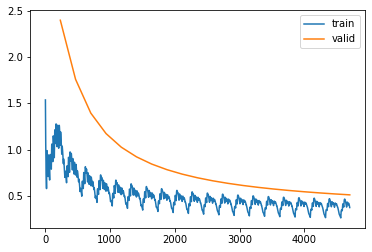

In [43]:
learn.recorder.plot_loss()

In [1]:
# ¿Se ha alcanzado la capacidad máx. del modelo?
# Posibilidad de aumentar el número de épocas
# Cambiar modelo por otro más complejo